In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import scipy.sparse as spa
import scipy.sparse.linalg as spalin
from tqdm import trange
import matplotlib.colors as mcolors
import imageio
import sys
sys.path.append("..")
sys.path.append("../dyn/")
from spatial_ultis import *
from dyn_ultis import *
from phase_params import *

In [5]:
trial1, trial2 = 19, 11

p_simul = Simul_Params(T = 40, t_step=100, record_step=10, activation_func='tanh')
p_net = generate_params_phase_try(trial1, trial2)

record_x = dyn_simul(p_net, p_simul, dim=2)
np.save(r"../../data/phase_dynrec_"+'try'+'_'+str(trial1)+'_'+str(trial2)+r'.npy',record_x)

100%|██████████| 4000/4000 [00:09<00:00, 408.23it/s]


In [2]:
def generate_params_phase_d_II_g_bar_IE(trial1:int, trial2:int, trial_num:int = 21):
    trial_num = trial_num

    N_E, N_I = 22500, 5625
    alpha = 0.8
    g_bar_EE, g_bar_IE, g_bar_EI, g_bar_II = 5.5, 9, -9, -4.25
    d_EE, d_IE, d_EI, d_II = 0.1, 0.1, 0.1, 0.16
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
    g_EE, g_EI, g_IE, g_II = 0.1,0.1,0.1,0.1

    d_II_list = np.linspace(0.01,0.10,trial_num)*2
    d_II = d_II_list[trial1]
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
    

    g_bar_IE_list = list(np.linspace(0,9,trial_num))
    g_bar_IE, g_bar_EI = g_bar_IE_list[trial2], -g_bar_IE_list[trial2]


    p_net = Network_Params(N_E = N_E, N_I = N_I,
        N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
        d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
        g_bar_EE = g_bar_EE, g_bar_EI = g_bar_EI, g_bar_IE = g_bar_IE, g_bar_II = g_bar_II,
        g_EE = g_EE, g_EI = g_EI, g_IE = g_IE, g_II = g_II
        )
    return p_net 

In [2]:
p_net = generate_params_phase_try(0,0)
J_spa = generate_net_sparse(p_net)

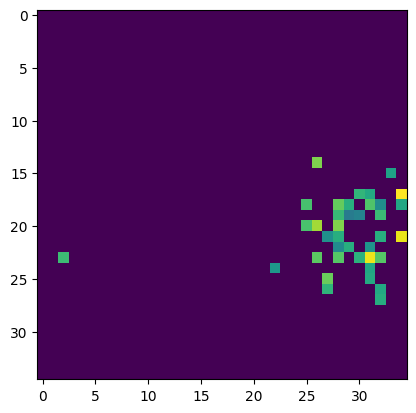

In [ ]:
J = J_spa.toarray()

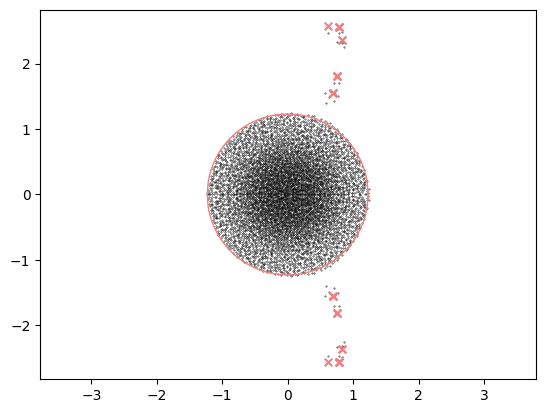

In [2]:
p_net = generate_params_phase_try(15,5)
J_spa = generate_net_sparse(p_net,homo_fix_point=True)
J = J_spa.toarray()
eigs, eig_V = np.linalg.eig(J)
plt.scatter(np.real(eigs), np.imag(eigs),s=0.1, marker='o', color='k')
temp_plot_pred(p_net, dim=2)

In [7]:
p_net.N_EE

153.5

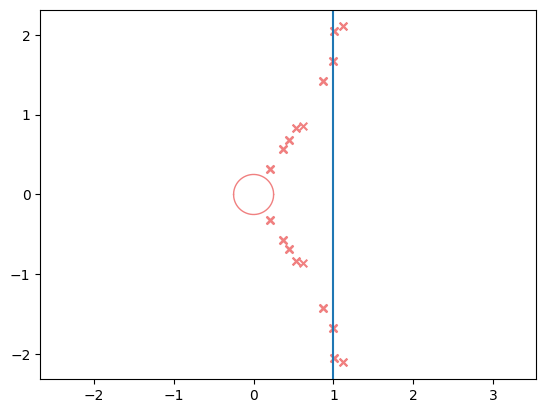

In [15]:
p_net = generate_params_phase_d_II_g_bar_IE(16,11)
temp_plot_pred(p_net, dim=2)
plt.axvline(x=1)

In [86]:
def generate_params_phase_d_II_g_bar_II(trial1:int, trial2:int, trial_num:int = 21):
    trial_num = trial_num

    N_E, N_I = 22500, 5625
    alpha = 0.8
    g_bar_EE, g_bar_IE, g_bar_EI, g_bar_II = 5.5, 5, -5, -4.25
    d_EE, d_IE, d_EI, d_II = 0.1, 0.1, 0.1, 0.1
    conn_NEE, conn_NIE, conn_NEI, conn_NII = tuple(alpha * np.array([2*np.pi * N_E * d_EE **2, 2*np.pi * N_I * d_IE **2, 2*np.pi * N_E * d_EI **2,2*np.pi * N_I * d_II **2]))
    g_EE, g_EI, g_IE, g_II = 0.1,0.1,0.1,0.1

    d_II_list = np.linspace(0.02,0.20,trial_num)
    d_II = d_II_list[trial1]

    g_bar_II_list = list(np.linspace(-1, -7, trial_num))
    g_bar_II = g_bar_II_list[trial2]

    p_net = Network_Params(N_E = N_E, N_I = N_I,
        N_EE = conn_NEE, N_IE = conn_NIE, N_EI = conn_NEI, N_II = conn_NII,
        d_EE = d_EE, d_IE = d_IE, d_EI = d_EI, d_II = d_II,
        g_bar_EE = g_bar_EE, g_bar_EI = g_bar_EI, g_bar_IE = g_bar_IE, g_bar_II = g_bar_II,
        g_EE = g_EE, g_EI = g_EI, g_IE = g_IE, g_II = g_II
        )
    
    return p_net   

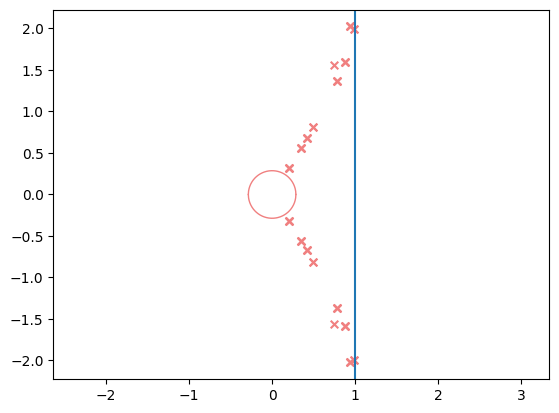

In [98]:
p_net = generate_params_phase_d_II_g_bar_II(10,10)
temp_plot_pred(p_net, dim=2)
plt.axvline(x=1)

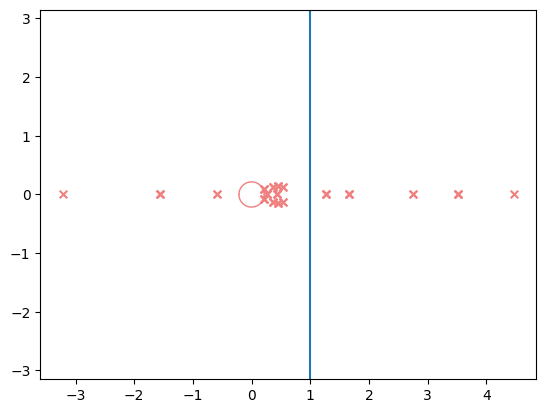

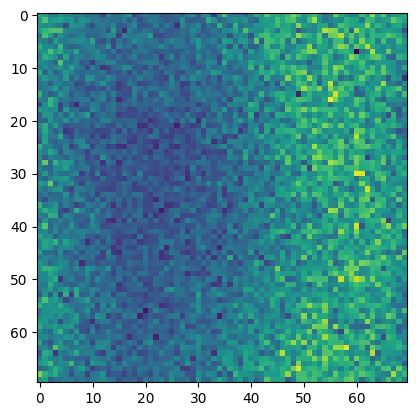

In [14]:
cov = np.cov(record_x.T[0:4900,100::])
plt.imshow((cov[0,:]).reshape((70,70)))

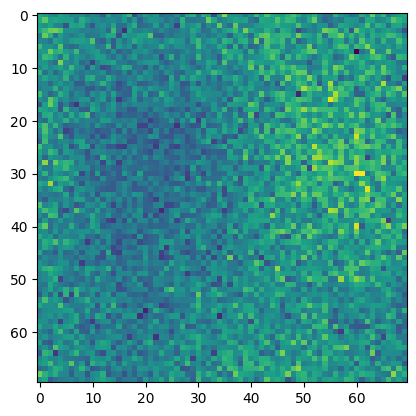

In [19]:
plt.imshow((cov[2450,:]).reshape((70,70)))

In [36]:
for trial2 in trange(21):
    p_simul = Simul_Params(T = 40, t_step=100, record_step=10, activation_func='tanh')
    p_net = generate_params_phase_try(10, trial2)

    record_x = dyn_simul(p_net, p_simul, dim=2)
    np.save(r"../../data/phase_dynrec_"+'try'+'_'+str(10)+'_'+str(trial2)+r'.npy',record_x)

100%|██████████| 21/21 [18:55<00:00, 54.06s/it]


In [39]:
#这个是神经元平均活跃程度
mean_acti = []
for trial2 in trange(21):
    record_x = np.load(r"../../data/phase_dynrec_"+'try'+'_'+str(10)+'_'+str(trial2)+r'.npy')
    mean_acti.append(np.mean(np.abs(record_x[100::,0:4900])))

100%|██████████| 21/21 [00:00<00:00, 25.17it/s]


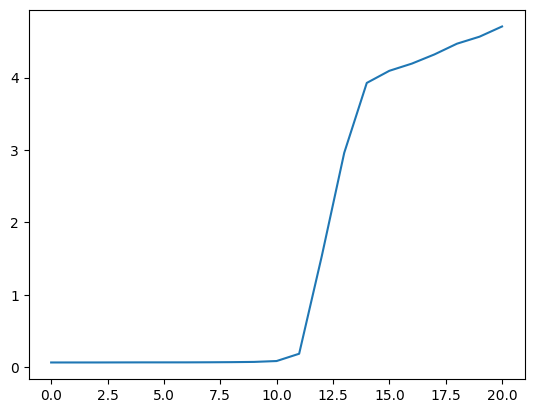

In [40]:
plt.plot(mean_acti)

In [58]:
#这是一个临时版本，只能处理恰好是整数的状态
def find_neibour(p_net: Network_Params, loc:int, radius:int = 6, dim:int =1):
    if dim == 1:
        neuro_num = np.arange(0, p_net.N_E)
        neibour_loc_list = np.arange(loc - radius, loc + radius + 1) % p_net.N_E
    if dim == 2:
        neuro_num = (np.arange(0, p_net.N_E)).reshape(int(np.ceil(np.sqrt(p_net.N_E))), int(np.ceil(np.sqrt(p_net.N_E))))
        loc_x, loc_y = loc % int(np.ceil(np.sqrt(p_net.N_E))), loc // int(np.ceil(np.sqrt(p_net.N_E)))
        neibour_loc_x = np.arange(loc_x - radius, loc_x + radius + 1) % int(np.ceil(np.sqrt(p_net.N_E)))
        neibour_loc_y = np.arange(loc_y - radius, loc_y + radius + 1) % int(np.ceil(np.sqrt(p_net.N_E)))
        neibour_loc_list = neuro_num[np.ix_(neibour_loc_y, neibour_loc_x)].reshape(-1)
    return neibour_loc_list


100%|██████████| 21/21 [00:00<00:00, 81.02it/s]


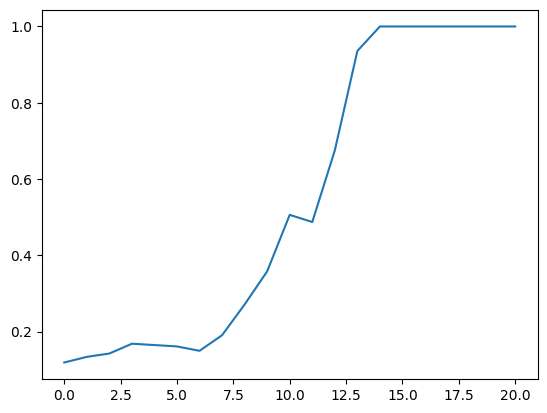

In [62]:
#这个是神经元的同步程度
loc_detech = 500
mean_sync = []
for trial2 in trange(21):
    record_x = np.load(r"../../data/phase_dynrec_"+'try'+'_'+str(10)+'_'+str(trial2)+r'.npy')
    p_net = generate_params_phase_try(10, trial2)
    neibour_loc_list = find_neibour(p_net, loc_detech)
    record_x_detech = record_x[100::, neibour_loc_list]
    mean_sync.append(np.mean(np.abs(np.sum(record_x_detech, axis=1))/np.sum(np.abs(record_x_detech), axis=1)))
plt.plot(mean_sync)


100%|██████████| 21/21 [00:00<00:00, 74.66it/s]


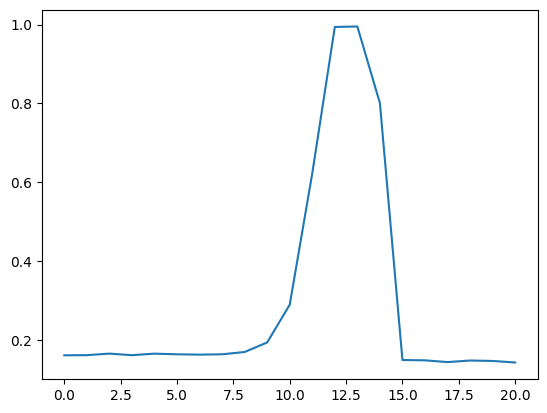

In [64]:
#这个是神经元之间的关联
loc_detech = 500
mean_corr = []
mean_corr_abs = []
for trial2 in trange(21):
    record_x = np.load(r"../../data/phase_dynrec_"+'try'+'_'+str(10)+'_'+str(trial2)+r'.npy')
    p_net = generate_params_phase_try(10, trial2)
    neibour_loc_list = find_neibour(p_net, loc_detech)
    record_x_detech = record_x[100::, neibour_loc_list]
    corr = np.corrcoef(record_x_detech.T)
    mean_corr.append(np.mean(corr))
    mean_corr_abs.append(np.mean(np.abs(corr)))
plt.plot(mean_corr_abs)